In [1]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from spectres import spectres

import matplotlib.pyplot as plt
%matplotlib notebook

This notebook will allow you to merge and evenly sample HST COS data for POX 186 using G130M and G160M gratings. 

## Retrieve Data

### G130M

In [2]:
g130m_data = fits.getdata('LEID01010/leid01010_x1dsum.fits')

In [3]:
g130m_data.columns

ColDefs(
    name = 'SEGMENT'; format = '4A'
    name = 'EXPTIME'; format = '1D'; unit = 's'; disp = 'F8.3'
    name = 'NELEM'; format = '1J'; disp = 'I6'
    name = 'WAVELENGTH'; format = '16384D'; unit = 'angstrom'
    name = 'FLUX'; format = '16384E'; unit = 'erg /s /cm**2 /angstrom'
    name = 'ERROR'; format = '16384E'; unit = 'erg /s /cm**2 /angstrom'
    name = 'ERROR_LOWER'; format = '16384E'; unit = 'erg /s /cm**2 /angstrom'
    name = 'GROSS'; format = '16384E'; unit = 'count /s'
    name = 'GCOUNTS'; format = '16384E'; unit = 'count'
    name = 'VARIANCE_FLAT'; format = '16384E'; unit = 'count'
    name = 'VARIANCE_COUNTS'; format = '16384E'; unit = 'count'
    name = 'VARIANCE_BKG'; format = '16384E'; unit = 'count'
    name = 'NET'; format = '16384E'; unit = 'count /s'
    name = 'BACKGROUND'; format = '16384E'; unit = 'count /s'
    name = 'DQ'; format = '16384I'
    name = 'DQ_WGT'; format = '16384E'
)

In [4]:
g130m_data['segment']

chararray(['FUVA', 'FUVB'], dtype='<U4')

In [5]:
# select segments
g130m_fuva = g130m_data['segment'] == 'FUVA'
g130m_fuvb = g130m_data['segment'] == 'FUVB'

In [6]:
# select the wavelength, flux, and error columns for each segment
wave_fuva_g130m = g130m_data[g130m_fuva]['wavelength'].flatten()
flux_fuva_g130m = g130m_data[g130m_fuva]['flux'].flatten()
err_fuva_g130m = g130m_data[g130m_fuva]['error'].flatten()

wave_fuvb_g130m = g130m_data[g130m_fuvb]['wavelength'].flatten()
flux_fuvb_g130m = g130m_data[g130m_fuvb]['flux'].flatten()
err_fuvb_g130m = g130m_data[g130m_fuvb]['error'].flatten()

In [7]:
wave_fuva_g130m, len(wave_fuva_g130m), wave_fuvb_g130m, len(wave_fuvb_g130m)

(array([1278.05147986, 1278.06145049, 1278.07142112, ..., 1441.38033385,
        1441.39030448, 1441.4002751 ], shape=(16384,), dtype='>f8'),
 16384,
 array([1124.81106949, 1124.82103579, 1124.83100209, ..., 1288.06908408,
        1288.07905038, 1288.08901669], shape=(16384,), dtype='>f8'),
 16384)

## G160M

In [8]:
g160m_data = fits.getdata('LE9701010/le9701010_x1dsum.fits')

In [9]:
g160m_data['segment']

chararray(['FUVA', 'FUVB'], dtype='<U4')

In [10]:
# select segments
g160m_fuva = g160m_data['segment'] == 'FUVA'
g160m_fuvb = g160m_data['segment'] == 'FUVB'

In [11]:
# select the wavelength, flux, and error columns for each segment
wave_fuva_g160m = g160m_data[g160m_fuva]['wavelength'].flatten()
flux_fuva_g160m = g160m_data[g160m_fuva]['flux'].flatten()
err_fuva_g160m = g160m_data[g160m_fuva]['error'].flatten()

wave_fuvb_g160m = g160m_data[g160m_fuvb]['wavelength'].flatten()
flux_fuvb_g160m = g160m_data[g160m_fuvb]['flux'].flatten()
err_fuvb_g160m = g160m_data[g160m_fuvb]['error'].flatten()

In [12]:
wave_fuva_g160m, len(wave_fuva_g160m), wave_fuvb_g160m, len(wave_fuvb_g160m)

(array([1609.64657009, 1609.65882301, 1609.67107593, ..., 1810.36163356,
        1810.37388648, 1810.3861394 ], shape=(16384,), dtype='>f8'),
 16384,
 array([1421.30748755, 1421.3197366 , 1421.33198566, ..., 1621.95926779,
        1621.97151684, 1621.9837659 ], shape=(16384,), dtype='>f8'),
 16384)

## Merge and Resample

Before merging the spectra, we first examine any overlapping wavelength regions, as is the case here. We will remove sections of each spectrum with zero throughput, which typically correspond to the transition between the two spectra.

In [13]:
# before trimming zero regions
wave_fuvb_g130m, wave_fuva_g130m, wave_fuvb_g160m, wave_fuva_g160m

(array([1124.81106949, 1124.82103579, 1124.83100209, ..., 1288.06908408,
        1288.07905038, 1288.08901669], shape=(16384,), dtype='>f8'),
 array([1278.05147986, 1278.06145049, 1278.07142112, ..., 1441.38033385,
        1441.39030448, 1441.4002751 ], shape=(16384,), dtype='>f8'),
 array([1421.30748755, 1421.3197366 , 1421.33198566, ..., 1621.95926779,
        1621.97151684, 1621.9837659 ], shape=(16384,), dtype='>f8'),
 array([1609.64657009, 1609.65882301, 1609.67107593, ..., 1810.36163356,
        1810.37388648, 1810.3861394 ], shape=(16384,), dtype='>f8'))

In [14]:
# after trimming zero regions
wave_fuvb_g130m[flux_fuvb_g130m!= 0], wave_fuva_g130m[flux_fuva_g130m!= 0], wave_fuvb_g160m[flux_fuvb_g160m !=0], wave_fuva_g160m[flux_fuva_g160m !=0]

(array([1131.28916664, 1131.29913295, 1131.30909925, ..., 1274.10629314,
        1274.11625944, 1274.12622574], shape=(14159,), dtype='>f8'),
 array([1286.82563233, 1286.83560296, 1286.84557358, ..., 1429.02672601,
        1429.03669663, 1429.04666726], shape=(14187,), dtype='>f8'),
 array([1430.35953966, 1430.37178871, 1430.38403777, ..., 1611.26584222,
        1611.27809128, 1611.29034033], shape=(14772,), dtype='>f8'),
 array([1621.54415428, 1621.5564072 , 1621.56866012, ..., 1801.64980827,
        1801.66206119, 1801.67431411], shape=(14696,), dtype='>f8'))

In [15]:
# merge trimmed spectra
wave_fuv = np.concatenate([wave_fuvb_g130m[flux_fuvb_g130m!= 0], wave_fuva_g130m[flux_fuva_g130m!= 0], wave_fuvb_g160m[flux_fuvb_g160m !=0], wave_fuva_g160m[flux_fuva_g160m !=0]])
flux_fuv = np.concatenate([flux_fuvb_g130m[flux_fuvb_g130m!= 0], flux_fuva_g130m[flux_fuva_g130m!= 0], flux_fuvb_g160m[flux_fuvb_g160m !=0], flux_fuva_g160m[flux_fuva_g160m !=0]])
err_fuv = np.concatenate([err_fuvb_g130m[flux_fuvb_g130m!= 0], err_fuva_g130m[flux_fuva_g130m!= 0], err_fuvb_g160m[flux_fuvb_g160m !=0], err_fuva_g160m[flux_fuva_g160m !=0]])

In [16]:
# take the difference between the first two wavelengths to determine the spacing we want to use for uniform sampling
wave_fuv[1] - wave_fuv[0]

np.float64(0.009966303314286051)

In [17]:
# let's round to 0.01 angstroms for the pixel size
new_wave_fuv = np.arange(wave_fuv[0], wave_fuv[-1], 0.01) 

Now we'll use the SpectRes package to perform the resampling. Anywhere that the new wavelength grid extends outside of the original wavlength grid will be filled with zeroes. We save both the original merged spectrum and the resampled spectrum to a FITS file.

In [18]:
new_flux_fuv, new_err_fuv = spectres(new_wave_fuv, wave_fuv, flux_fuv, err_fuv, fill=0)

/user/irivera/linux/miniconda3/envs/stenv/lib/python3.11/site-packages/spectres/spectral_resampling.py:104: RuntimeWarning: Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument (by default 0).
  warnings.warn(


In [19]:
spectrum_orig = [wave_fuv, flux_fuv, err_fuv]
spectrum_resamp = [new_wave_fuv, new_flux_fuv, new_err_fuv]

In [20]:
# Create Astropy Tables
table_orig = Table(spectrum_orig, names=('wavelength', 'flux', 'error'))
table_resamp = Table(spectrum_resamp, names=('wavelength', 'flux', 'error'))

# Convert the tables to FITS HDUs and give them specific names
hdu1 = fits.BinTableHDU(table_orig, name='ORIGINAL_SPECTRUM')
hdu2 = fits.BinTableHDU(table_resamp, name='RESAMPLED_SPECTRUM')

# Create a Primary HDU
primary_hdu = fits.PrimaryHDU()

# Create an HDU list with the primary HDU and the table HDUs:
hdul = fits.HDUList([primary_hdu, hdu1, hdu2])

# Write the HDU list to a new FITS file
hdul.writeto('pox186_g130m_g160m_spectrum.fits', overwrite=True)

In [21]:
fits.info("pox186_g130m_g160m_spectrum.fits")

Filename: pox186_g130m_g160m_spectrum.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  ORIGINAL_SPECTRUM    1 BinTableHDU     15   57814R x 3C   [D, E, E]   
  2  RESAMPLED_SPECTRUM    1 BinTableHDU     15   67039R x 3C   [D, D, D]   


<IPython.core.display.Javascript object>


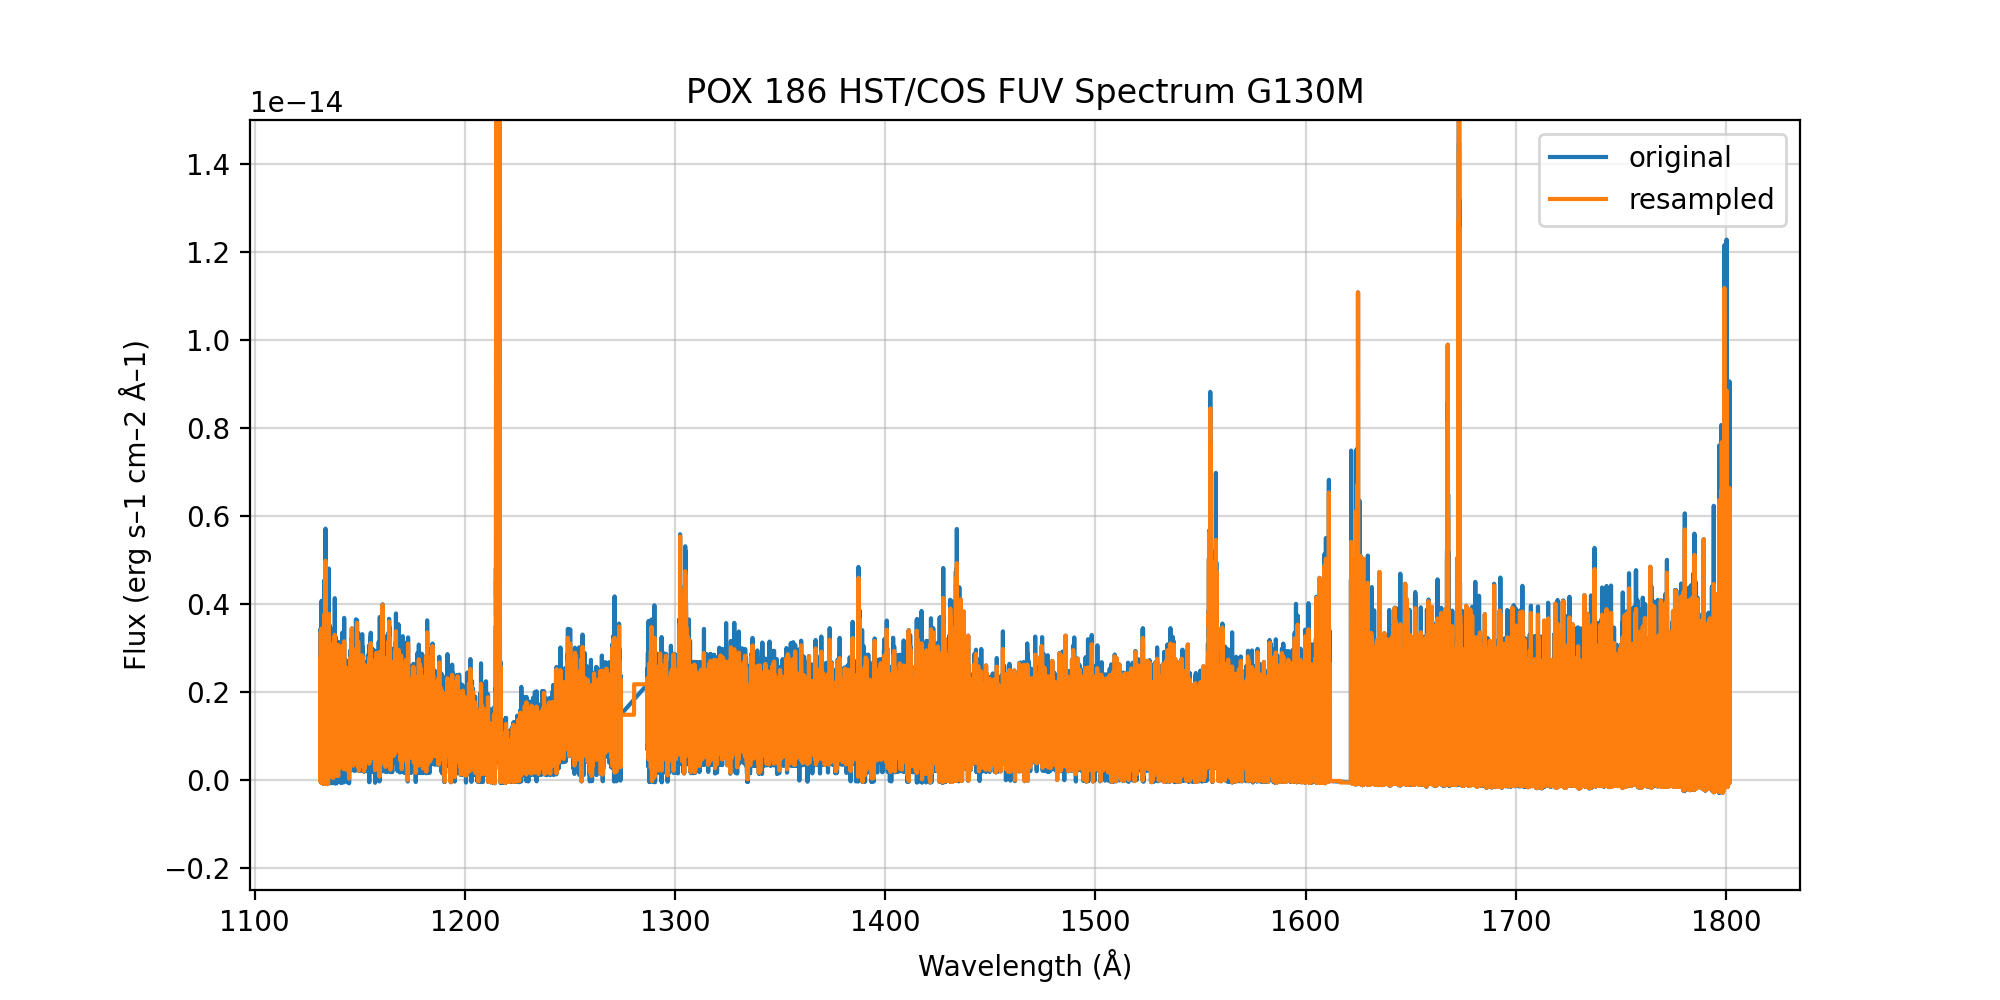

In [22]:
# Plot entire spectrum
plt.figure(figsize=(10, 5))
plt.plot(wave_fuv, flux_fuv, label="original")
plt.plot(new_wave_fuv, new_flux_fuv, label="resampled")

plt.title('POX 186 HST/COS FUV Spectrum G130M')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux (erg s–1 cm–2 Å–1)')
plt.grid(alpha=0.5)
plt.ylim(-.25e-14, 1.5e-14)
plt.legend()

Now let's perform a run on the resampled spectrum by modifying the following parameters of the config.ini template file (the other parameters are left to their defaults if not shown here):

```
[Settings]

galaxy_filename =  pox186_g130m_g160m_spectrum.fits
segment = 2 # the resampled spectrum is located in the 2nd HDU FITS extension
bin_width = 6 # we want to perform 6-pixel binning
z_guess = 0.0040705

[instrument]

FWHM_gal = 0.22

[dereddening]

ebv = 0.0385

[library]

Library = STARBURST99 # switch this to BPASS to get BPASS results
lib_path = None # Uses sample library; see the README for instructions on how to fetch the full suite of libraries
evol_track = geneva_std
IMF = salpeter # switch this to imf135all_100 for BPASS which is equivalent to salpeter
age_range = [0.0, 0.01]
norm_range = [1350, 1360]

[fit]

bounds = [[0.0, 100.], [0.0, 40.]]
degree = -1
dust = {"start": [0.0], "bounds": [0, 4]}
mask = [[1185, 1230], [1268, 1283], [1296, 1303], [1547, 1552], [1598, 1623], [1659, 1667]]
n_iterations = 100
```

The `pox186_config.ini` file is already included in this directory with the necessary parameters configured. While the output results are also present, the only files required to successfully run **GalSpecFitx** are:

- `pox186_config.ini`  
- `pox186_g130m_g160m_spectrum.fits`

Once this is done we can run GalSpecFitX

```
galspecfitx --input_path=. --config_file=pox186_config.ini --output_path=.
```